__SENTIMENT ANALYSIS ON TWITTER COMMENTS__

# Sentiment_Analysis
Sentiment Analysis with Python

# Summary 
Sentiment Analysis involves using a machine learning model to categorize opinions expressed in text, such as tweets or chats, about a brand or product. It aims to determine whether the sentiments are positive, negative, or neutral. This analysis helps brands or product teams understand the public perception of their products, identify areas for improvement, and evaluate pricing strategies. The goal of the project mentioned is to assess the accuracy of a machine learning model in predicting sentiment (Racist or Non-Racist) based on tweets. The project utilized a dataset consisting of tens of thousands of tweets.

### This dataset contain the data of tweets which are either racist or not racist.

Content
id : Tweets ID
label : 1 -> denotes the tweet is racist/sexist 0 -> denotes the tweet is not racist
tweet : Content of tweets

In [30]:
# !py -m pip install unidecode

In [1]:
import numpy as np
import pandas as pd
import nltk
import nltk.corpus
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import word_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.tokenize import WhitespaceTokenizer
from textblob import TextBlob
import json
import string
import random
import matplotlib.pyplot as plt
import PIL
from PIL import ImageFont
from wordcloud import WordCloud
plt.style.use('fivethirtyeight')
import cleantext
from cleantext import clean

In [2]:
pwd

'c:\\Users\\Ayo Agbaje\\Documents\\Code\\Python\\GIGS\\PYTHON_docs\\py_files\\Sentiment_Analysis\\notebook'

In [3]:
df_ = pd.read_csv('../data/Twitter_Sentiments.csv', delimiter = ',')
df_.columns = ['id', 'Classification', 'Comments']
df_.sample(5)

,id,Classification,Comments
28391,28392,1,@user racist attack on three muslim women in #...
14537,14538,0,@user oh noes. youtube is persecuting and cen...
5999,6000,0,#model i love u take with u all the time in ...
11370,11371,0,loving our life together â¤ #teamvees
23360,23361,1,@user #allahsoil marx foretold that a revoluti...


In [4]:
# clean_text
def clean_text(text_):
    return clean(text_, no_emoji = True)

df_['Comments'] = df_['Comments'].apply(clean_text)

In [18]:
# Print any 5 random Comments
for num, i in enumerate(range(5)):
    random_statement = random.choice(df_['Comments'].values)
    print(f"Sentence {num}, {random_statement}")

Sentence 0, sad moment when @user does not recognize me :( #abhi #newaccountoldfriends
Sentence 1, hallwayst! #getaway #live #love #laugh #gv #blessed #fun #fab #pinay #pinoy #igersmanila...
Sentence 2, @user happy faces at the beach during the yoga, surf & nourish retreat #yoga #retreat ...
Sentence 3, summer truly stas when you see @user #grahamepark fun day posters! @user @user
Sentence 4, happy monday !!


In [36]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              31962 non-null  int64 
 1   Classification  31962 non-null  int64 
 2   Comments        31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [37]:
df_.isnull().any()

id                False
Classification    False
Comments          False
dtype: bool

In [38]:
df_[df_['Comments'].isnull() == True]

,id,Classification,Comments


In [39]:
df_[df_['Classification'].isnull() == True]

,id,Classification,Comments


In [40]:
df_ = df_.dropna(axis = 0)
df_.head()

,id,Classification,Comments
0,1,0,@user when a father is dysfunctional and is so...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ur!!!
4,5,0,factsguide: society now #motivation


In [41]:
df_.isnull().any()

id                False
Classification    False
Comments          False
dtype: bool

In [42]:
df_['Length'] = df_['Comments'].apply(len)
df_.head()

,id,Classification,Comments,Length
0,1,0,@user when a father is dysfunctional and is so...,99
1,2,0,@user @user thanks for #lyft credit i can't us...,119
2,3,0,bihday your majesty,19
3,4,0,#model i love u take with u all the time in ur!!!,49
4,5,0,factsguide: society now #motivation,35


In [43]:
df_[df_['Length'] == df_['Length'].max()]

,id,Classification,Comments,Length
2962,2963,0,so the @user can remove saudi arabia from a bl...,137


In [44]:
sentiment_map = {
    1: 'Racist',
    0: 'Not Racist'
}

df_['Classification'] = df_['Classification'].map(sentiment_map)

In [45]:
sentiment_count_ = df_['Classification'].value_counts()
sentiment_count_ = pd.DataFrame(data = sentiment_count_)
sentiment_count_.columns = ["COUNT"]
sentiment_count_

,COUNT
Not Racist,29720
Racist,2242


Text(0.5, 1.0, 'PIE CHART SHOWING DISTRIBUTION OF SENTIMENT OF TWEETS')

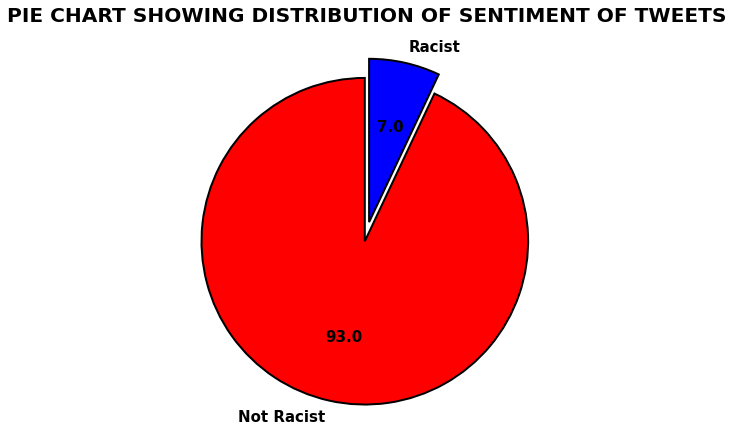

In [46]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (7,7), facecolor = 'white')
sentiment_count_['COUNT'].plot.pie(ax = ax, textprops = {'color': 'black', 'weight': 'bold', 'size': 15}, ylabel = '', autopct = '%.1f',
                                   colors = ['red', 'blue', 'grey'], shadow = False, explode = (0.06, 0.06), startangle = 90,
                                   wedgeprops = {'linewidth': 2, 'edgecolor': 'black'})
plt.title('PIE CHART SHOWING DISTRIBUTION OF SENTIMENT OF TWEETS', fontweight = 'bold')

In [47]:
# Print any 5 random Comments
for num, i in enumerate(range(5)):
    random_statement = random.choice(df_['Comments'].values)
    print(f"Sentence {num}, {random_statement}")

Sentence 0, happy father's day 2016! #love fathersday #father #fathersday #weekend #event #celebration #family #lunch #dinner #mother #son
Sentence 1, ready . . #snorkeling #swim #swimming #sea #laut #beach #picoftheday #hootd
Sentence 2, #sotrue #home #family #love money isn't everything and #blessed
Sentence 3, @user stop waiting for happiness to come and make the most of now. #wicca #positive #pagan #now
Sentence 4, sick #badger #dorset wife brought gloves & blanket drove the sqeuling guy to vet but nothing could be done


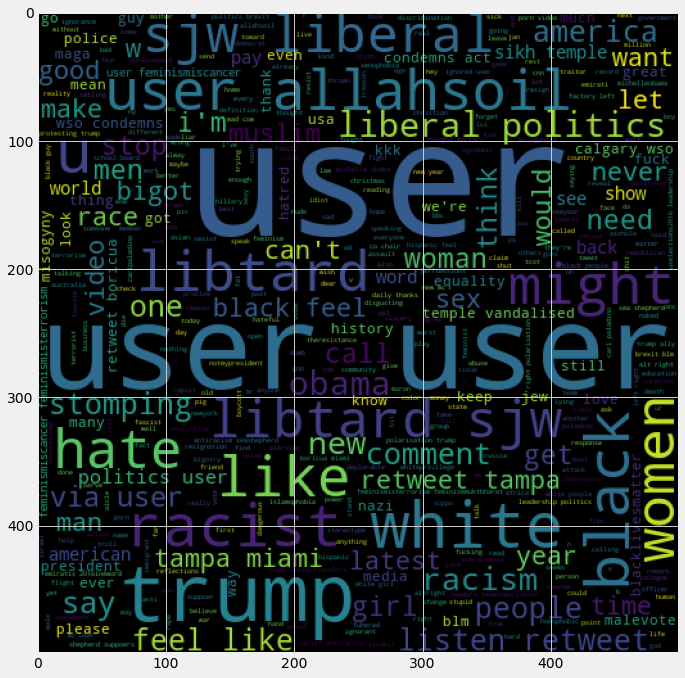

In [48]:
# All Racist comments wordcloud
stopwords_ = stopwords.words('english')
racist_df_ = df_[df_['Classification'] == 'Racist']
racist_comments_ = []
for i in racist_df_['Comments'].values:
    racist_comments_.append(i)

racist_comments_ = ' '.join(racist_comments_)
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (11,11))

word_cloud = WordCloud(max_words = 450, width = 500, height = 500, stopwords = stopwords_)
img_ = word_cloud.generate(racist_comments_)
plt.imshow(img_)
# img_.to_file('neg.png')

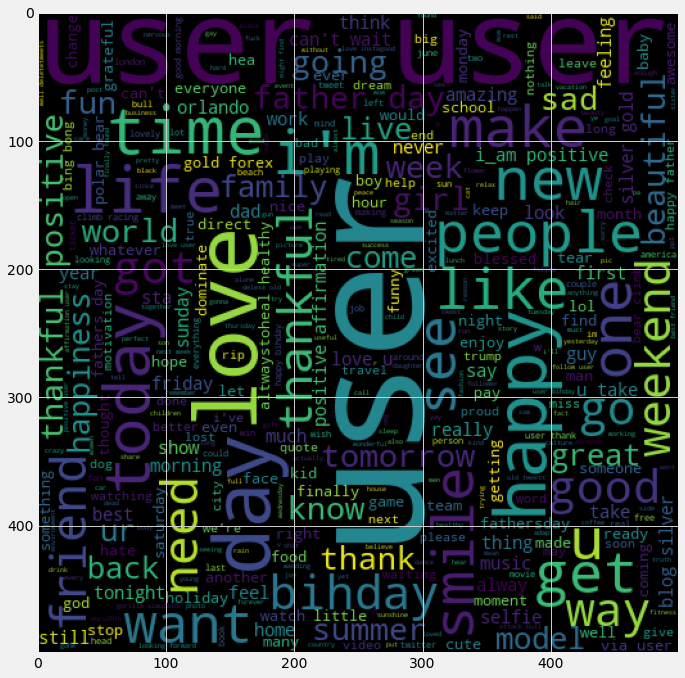

In [49]:
# All non-Racist comments wordcloud
stopwords_ = stopwords.words('english')
non_racist_df_ = df_[df_['Classification'] == 'Not Racist']
non_racist_comments_ = []
for i in non_racist_df_['Comments'].values:
    non_racist_comments_.append(i)

non_racist_comments_ = ' '.join(non_racist_comments_)
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (11,11))

word_cloud = WordCloud(max_words = 450, width = 500, height = 500, stopwords=stopwords_)
img_ = word_cloud.generate(non_racist_comments_)
plt.imshow(img_)

In [290]:
# Convert all text to lowercase
def lower_case(text_):
    return text_.lower()

df_['Comments'] = df_['Comments'].apply(lower_case)

In [291]:
# Remove stopwords
def remove_stopwords(text_):
    wst = WhitespaceTokenizer()
    tokens_ = wst.tokenize(text_)
    stop_words_ = stopwords.words('english')
    stop_words_.remove('not')
    stop_words_.remove('no')

    stopword_free_text_ = []
    for words_ in tokens_:
        if words_ not in stop_words_:
            stopword_free_text_.append(words_)
    
    new_text_ = ' '.join(stopword_free_text_)
    return new_text_


df_['Comments'] = df_['Comments'].apply(remove_stopwords)

In [292]:
# Print any 5 random Comments
for num, i in enumerate(range(5)):
    random_statement = random.choice(df_['Comments'].values)
    print(f"Sentence {num}, {random_statement}")

Sentence 0, #fo attack bull chase: leave lot despite fact strong source food f
Sentence 1, @user can't wait see release line ðªð¤ðð
Sentence 2, @user would love taste nashville tix!thanks
Sentence 3, @user not necessarily america definitely ceain individuals.
Sentence 4, feeling friends left place use live raised #son. life live #mining world!


In [293]:
# Remove Punctuations
def remove_punctuations(text_):
    # ttt = ToktokTokenizer()
    tokens_ = text_
    punctuations_ = string.punctuation

    punctuation_free_text_ = []
    for i in tokens_:
        if i not in punctuations_:
            punctuation_free_text_.append(i)
    
    new_text_ = ''.join(punctuation_free_text_)
    return new_text_


df_['Comments'] = df_['Comments'].apply(remove_punctuations)

In [294]:
# Print any 5 random Comments
for num, i in enumerate(range(5)):
    random_statement = random.choice(df_['Comments'].values)
    print(f"Sentence {num}, {random_statement}")

Sentence 0, user user wow us open amateur hour fox show golf quite people walking front commentators air
Sentence 1, travelling bhubaneswar movies  user findingdory user user theconjuring2
Sentence 2, insane many russian athletes using meldonium 6 months seems right me career over
Sentence 3, please stop
Sentence 4, black amp feel like â¦on you listen retweet tampa miami newyorkâ¦


In [ ]:
# Remove all hashtags and user tags
def remove_tags(text_):
    wst = WhitespaceTokenizer()
    tokens_ = wst.tokenize(text_)

    tag_free_text_ = []
    for word_ in tokens_:
        if '@' not in word_ or '#' not in word_:
            tag_free_text_.append(word_)
    
    text__ = ' '.join(tag_free_text_)
    return text_

df_['Comments'] = df_['Comments'].apply(remove_tags)

In [295]:
# Remove all New Lines
def remove_new_lines(text_):
    return text_.replace('\n', '')

df_['Comments'] = df_['Comments'].apply(remove_new_lines)

In [5]:
import sklearn
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV, train_test_split, KFold
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, precision_score, f1_score
from skopt import BayesSearchCV
from skopt.space import Categorical, Real, Real
from xgboost import XGBClassifier

In [297]:
X = df_['Comments']
y = df_['Classification']

In [310]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=42)
X_train.shape, X_test.shape

((25569,), (6393,))

In [311]:
y_train

12110        Racist
14081    Not Racist
1829     Not Racist
2769     Not Racist
31818    Not Racist
            ...    
29802    Not Racist
5390     Not Racist
860          Racist
15795    Not Racist
23654    Not Racist
Name: Classification, Length: 25569, dtype: object

In [313]:
mnb = MultinomialNB()
lr = LogisticRegression()
svc = SVC()
xgbc = XGBClassifier()

In [300]:
bow = CountVectorizer(
    min_df = 0.01,
    max_df = 0.85,
    binary = False,
    ngram_range=(1,3)
)

bow.fit(X_train)
cv_x_train = bow.transform(X_train)
cv_x_test = bow.transform(X_test)

In [301]:
print(f"Shape of bow train set; {cv_x_train.shape}")
print(f"Shape of bow test set; {cv_x_test.shape}")

Shape of bow train set; (25569, 101)
Shape of bow test set; (6393, 101)


In [302]:
tfidf_ = TfidfVectorizer(
    min_df = 0.01,
    max_df = 0.85,
    use_idf = True,
    ngram_range=(1,3)
)

tfidf_.fit(X_train)
tfidf_x_train = tfidf_.transform(X_train)
tfidf_x_test = tfidf_.transform(X_test)

In [303]:
print(f"Shape of tf-idf train set; {tfidf_x_train.shape}")
print(f"Shape of tf-idf test set; {tfidf_x_test.shape}")

Shape of tf-idf train set; (25569, 101)
Shape of tf-idf test set; (6393, 101)


In [317]:
import pickle
help(pickle.load)

Help on built-in function load in module _pickle:

load(file, *, fix_imports=True, encoding='ASCII', errors='strict', buffers=())
    Read and return an object from the pickle data stored in a file.
    
    This is equivalent to ``Unpickler(file).load()``, but may be more
    efficient.
    
    The protocol version of the pickle is detected automatically, so no
    protocol argument is needed.  Bytes past the pickled object's
    representation are ignored.
    
    The argument *file* must have two methods, a read() method that takes
    an integer argument, and a readline() method that requires no
    arguments.  Both methods should return bytes.  Thus *file* can be a
    binary file object opened for reading, an io.BytesIO object, or any
    other custom object that meets this interface.
    
    Optional keyword arguments are *fix_imports*, *encoding* and *errors*,
    which are used to control compatibility support for pickle stream
    generated by Python 2.  If *fix_imports* i

In [315]:
for i in range(5):
    cv = KFold(
        n_splits=5,
        shuffle = True,
        random_state=42
    )
    result_ = cross_val_score(
        estimator=svc,
        X = tfidf_x_train,
        y = y_train,
        cv = cv,
        scoring = 'accuracy'
    )
    accuraacy_ = np.mean(result_)
    print(f"Iteration {i + 1}, Accuracy; {accuraacy_}")

Iteration 1, Accuracy; 0.9325746154124452
Iteration 2, Accuracy; 0.9325746154124452
Iteration 3, Accuracy; 0.9325746154124452
Iteration 4, Accuracy; 0.9325746154124452
Iteration 5, Accuracy; 0.9325746154124452


In [322]:
mnb.fit(tfidf_x_train, y_train)

MultinomialNB()

In [306]:
preds_ = mnb.predict(tfidf_x_test)
preds_

array(['Not Racist', 'Not Racist', 'Not Racist', ..., 'Not Racist',
       'Not Racist', 'Not Racist'], dtype='<U10')

In [320]:
accuracy_score_= accuracy_score(y_true = y_test, y_pred = preds_)
accuracy_score_

0.9302361958391991

In [323]:
help(plt.imsave)

Help on function imsave in module matplotlib.pyplot:

imsave(fname, arr, **kwargs)
    Save an array as an image file.
    
    Parameters
    ----------
    fname : str or path-like or file-like
        A path or a file-like object to store the image in.
        If *format* is not set, then the output format is inferred from the
        extension of *fname*, if any, and from :rc:`savefig.format` otherwise.
        If *format* is set, it determines the output format.
    arr : array-like
        The image data. The shape can be one of
        MxN (luminance), MxNx3 (RGB) or MxNx4 (RGBA).
    vmin, vmax : float, optional
        *vmin* and *vmax* set the color scaling for the image by fixing the
        values that map to the colormap color limits. If either *vmin*
        or *vmax* is None, that limit is determined from the *arr*
        min/max value.
    cmap : str or `~matplotlib.colors.Colormap`, default: :rc:`image.cmap`
        A Colormap instance or registered colormap name. The

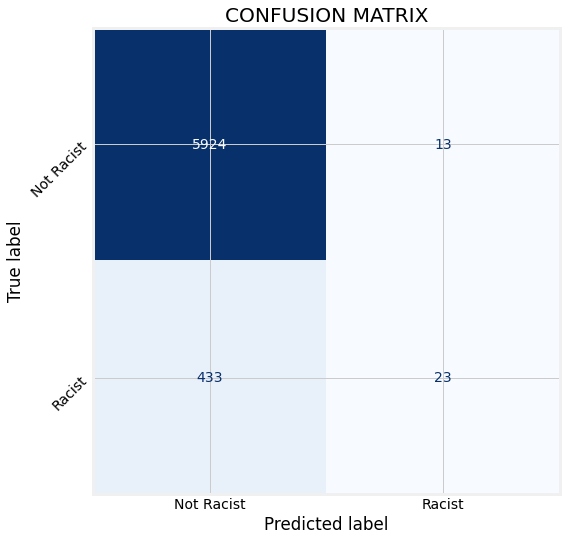

In [308]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8), facecolor = 'white')
plot_ = ConfusionMatrixDisplay.from_predictions(y_true = y_test, y_pred = preds_, ax = ax, cmap = 'Blues', colorbar = False, labels = df_['Classification'].unique())
ax.set_title('CONFUSION MATRIX')
ax.tick_params(axis = 'x', labelsize = 14)
ax.tick_params(axis = 'y', labelsize = 14, rotation = 45)


In [4]:
df__ = pd.read_csv('../data/xtrain.csv')
df__

,Comments
0,user user user ive paying attention past year8...
1,user raft building salford quays pa gmw fun ou...
2,friday ð ð» gdegblog friday selfie beard g...
3,fashion true fact
4,share simple elegant businesscards designed gr...
...,...
25564,waltdisneyreso ashamed themselves knew alligat...
25565,user invited user catch stop talking much love...
25566,black professor makes assumptions entire race ...
25567,lgbtqhatetrumppay total liberal trash amp path...


In [6]:
df_2 = pd.read_csv('../data/ytrain.csv')
df_2.head()

,Classification
0,Racist
1,Not Racist
2,Not Racist
3,Not Racist
4,Not Racist


In [9]:
df__ = df__.dropna(axis = 0)
df_2 = df_2.dropna(axis = 0)

In [10]:
x = df__['Comments']
y = df_2['Classification']

In [15]:
tfidf_ = CountVectorizer(
    min_df = 0.01,
    max_df = 0.85,
    binary= True,
    ngram_range=(1,3)
)

tfidf_.fit(x)
tfidf_x_train = tfidf_.transform(x)
# tfidf_x_test = tfidf_.transform(X_test)

In [16]:
print(tfidf_x_train)

  (0, 89)	1
  (0, 90)	1
  (0, 91)	1
  (1, 27)	1
  (1, 89)	1
  (2, 25)	1
  (5, 89)	1
  (7, 31)	1
  (7, 58)	1
  (8, 36)	1
  (8, 43)	1
  (8, 46)	1
  (8, 49)	1
  (8, 64)	1
  (8, 73)	1
  (9, 71)	1
  (10, 89)	1
  (10, 90)	1
  (10, 91)	1
  (10, 94)	1
  (11, 3)	1
  (11, 22)	1
  (11, 44)	1
  (11, 100)	1
  (12, 59)	1
  :	:
  (25554, 89)	1
  (25554, 90)	1
  (25554, 91)	1
  (25555, 5)	1
  (25555, 13)	1
  (25555, 46)	1
  (25555, 73)	1
  (25555, 89)	1
  (25556, 72)	1
  (25557, 46)	1
  (25558, 18)	1
  (25558, 38)	1
  (25559, 37)	1
  (25561, 45)	1
  (25561, 89)	1
  (25562, 8)	1
  (25563, 89)	1
  (25564, 46)	1
  (25564, 55)	1
  (25564, 89)	1
  (25565, 60)	1
  (25565, 95)	1
  (25566, 3)	1
  (25567, 66)	1
  (25567, 94)	1


In [17]:
tfidf_x_train.shape

(25568, 101)

In [19]:
y.shape

(25569,)

In [18]:
import os

In [19]:
# Create Requirements.txt file
os.chdir('C:/Users/Ayo Agbaje/Documents/Code/Python/GIGS/PYTHON_docs/py_files/Sentiment_Analysis')

file_ = open('requirements.txt', 'w')
file_.write('''pandas
numpy
scikit-learn
yaml
matplotlib
wordcloud
Pillow
nltk
pickle4
''')
file_.close()

In [5]:
import pandas as pd

text = ['I love you']

data = {
        'comment': text
    }
df_ = pd.DataFrame(data = data)
df_


,comment
0,I love you
